# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

## Import библиотек

In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
from google.colab import files # чтобы загружать файлы в облако через проводник

import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации

from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку
from sklearn.preprocessing import MinMaxScaler # Объект Нормализации от Scikit-learn

## Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

Saving cars_moldova_cat_num.csv to cars_moldova_cat_num.csv


## Считываем файл в DataFrame



метод `.read_csv(path,delimiter)`

Примечание: для работы используются данные посли очистки от выбросов и после кодирования категориальных признаков

[Блокнот в котором это выполнялось](https://colab.research.google.com/drive/1ZvcWGTGUWbzqhZ1cbNwq4LgztayuScxc#scrollTo=R6oU8RpZxT66&line=1&uniqifier=1)

In [ ]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df

Make  Model  Year  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0        40     92  2011      4  195000.0                1800.0          2   
1        32     62  2014     11  135000.0                1500.0          0   
2        32     71  2012     11  110000.0                1500.0          0   
3        28     23  2006     11  200000.0                1600.0          3   
4        23    124  2000      5  300000.0                2200.0          0   
...     ...    ...   ...    ...       ...                   ...        ...   
32069    42     88  2016     10   88000.0                1800.0          4   
32070    19     53  2002      3  225000.0                1800.0          3   
32071     6     77  2015     11   89000.0                1500.0          0   
32072    22     10  2006      1  370000.0                2000.0          0   
32073    32     62  2006      6  300000.0                1500.0          0   

       Transmission  Price(euro)       km_year  
0                 1       7750.0  17727.272727  
1                 0       8550.0  16875.000000  
2                 0       6550.0  11000.000000  
3                 0       4100.0  12500.000000  
4                 0       3490.0  13636.363636  
...             ...          ...           ...  
32069             1      11500.0  14666.666667  
32070             0       4400.0  11250.000000  
32071             0       7000.0  12714.285714  
32072             0       4000.0  23125.000000  
32073             0       4000.0  18750.000000  

[32074 rows x 10 columns]

Список имён колонок с числовыми и категориальными значениями

In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']


# Классификация Методом к-Ближайших Соседей


In [ ]:
from sklearn.neighbors import  KNeighborsClassifier # Классификация К-Ближайших соседей от scikit-learn

from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации
from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import confusion_matrix # матрица ошибок от Scikit-learn

from sklearn.metrics import accuracy_score as acc # функция расчета доли правильных ответов от Scikit-learn
from sklearn.metrics import f1_score as f1 # функция расчета f1-меры от Scikit-learn

In [ ]:
X = df[num_columns].values  # берем, например только числовые данные
y = df["Transmission"].values # для классификации целевая метрика - тип Трансмиссии
features_names = df[num_columns].columns

# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# нормализуем
scaler  = MinMaxScaler()
scaler.fit(X_train) # для тренировочных сначала "обучаем"
X_train = scaler.transform(X_train) # потом преобразуем  transform
X_test  = scaler.transform(X_test) # для тестовых - просто transform

In [ ]:
#@title Гиперпараметры к-Ближайших Соседей{ run: "auto" }
#@markdown ### количество соседей
k = 9 #@param {type:"slider", min:1, max:15, step:1}
#@markdown ### тип весов
weights = 'distance' #@param [ 'uniform', 'distance']{type:"string"}

# создаем объект класса с указанием гиперпараметров
kNN = KNeighborsClassifier(n_neighbors=k,
                           weights=weights )

# обучаем на тренировочных данных
kNN.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=kNN.predict(X_test)

# выбираем метрики которые будем оценивать
# в виде словаря
scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}
# используем функцию кросс-валидации
scores = cross_validate(kNN, # какую модель тестируем
                        X_train, y_train, # на каких данных
                      scoring=scoring, #на каких метриках
                      # как разбиваем данные при кросс-валидации
                      cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42))


print('Результаты Кросс-валидации')
DF_cv_kNN = pd.DataFrame(scores)
display(DF_cv_kNN)
print('\n')
print(DF_cv_kNN.mean()[2:])

# та самая функция которая считает много метрик
print (classification_report(y_test, # правильные ответы
                             y_predict, # предсказания
                             # имена классов
                             target_names=['Manual','Automatic']))

Результаты Кросс-валидации


fit_time  score_time  test_ACC   test_F1  test_Precision  test_Recall
0  0.013513    0.047468  0.806279  0.781627        0.810094     0.755092
1  0.012755    0.044958  0.820490  0.795119        0.835470     0.758487
2  0.012502    0.049319  0.810022  0.785840        0.814680     0.758972
3  0.014084    0.053024  0.810022  0.787016        0.811117     0.764306
4  0.012631    0.049517  0.805791  0.780020        0.812401     0.750121



test_ACC          0.810521
test_F1           0.785924
test_Precision    0.816752
test_Recall       0.757396
dtype: float64
              precision    recall  f1-score   support

      Manual       0.82      0.87      0.84      5253
   Automatic       0.83      0.77      0.80      4370

    accuracy                           0.82      9623
   macro avg       0.82      0.82      0.82      9623
weighted avg       0.82      0.82      0.82      9623



## Поиск Лучших Гиперпараметров по Сетке Параметров

In [ ]:
from sklearn.model_selection import GridSearchCV # для поиска по сетке гиперпараметров

In [ ]:
# словарь гиперпараметров в виде
# обозначение гиперпараметров : в каких значениях проверяем
# обозначение должно "досимвольно" совпадать с тем что в документации
parameters = {'n_neighbors':np.arange(1,30,4),
              'weights':['uniform', 'distance']}

kNN_search = GridSearchCV(estimator = KNeighborsClassifier(), # оптимизируем наш модель
                          verbose = 3, # чтобы он всё подробно расписал. если не интересно - пишем 0
                          param_grid=parameters , # что оптимизируем - берем из словарика
                          cv=StratifiedKFold(n_splits=5) # указываем тип кросс-валидации
                          )

Стандартное обучение через метод `.fit()`

В этом случае он будет тестировать для выбранного `estimator` все перечисленные комбинации гиперпараметров / аргументов из `param_grid`

In [ ]:
kNN_search.fit(X_train, y_train)

kNNbest=kNN_search.best_estimator_

kNNbest.fit(X_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.778 total time=   0.1s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.780 total time=   0.1s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.776 total time=   0.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.765 total time=   0.1s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.770 total time=   0.1s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.778 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.780 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.776 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.765 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.770 total time=   0.0s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.807 total time=   0.1s
[CV 2/5] END ....n_neighbors=5, weights=uniform;

Лучший Кандидат

In [ ]:
kNN_search.best_estimator_

KNeighborsClassifier(n_neighbors=25, weights='distance')

Оценим лучшего кандидата на метриках при кросс-валидации и на тестовых данных

In [ ]:
scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

scores = cross_validate(kNNbest, X_train, y_train,
                      scoring=scoring,
                      cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42))


print('Результаты Кросс-валидации')
DF_cv_best_kNN = pd.DataFrame(scores)
display(DF_cv_best_kNN)
print('\n')
print(DF_cv_best_kNN.mean()[2:])

Результаты Кросс-валидации


fit_time  score_time  test_ACC   test_F1  test_Precision  test_Recall
0  0.012963    0.075139  0.813627  0.786969        0.828066     0.749758
1  0.012635    0.072495  0.829176  0.803283        0.852477     0.759457
2  0.012434    0.078766  0.820713  0.794170        0.839913     0.753152
3  0.016728    0.089633  0.820490  0.795328        0.834755     0.759457
4  0.012949    0.077919  0.816258  0.790130        0.830481     0.753518



test_ACC          0.820053
test_F1           0.793976
test_Precision    0.837139
test_Recall       0.755068
dtype: float64


функция которая считает много метрик классификации

In [ ]:
y_predict=kNNbest.predict(X_test)

print (classification_report(y_test, y_predict, target_names=['Manual','Automatic']))

              precision    recall  f1-score   support

      Manual       0.82      0.89      0.85      5253
   Automatic       0.85      0.76      0.80      4370

    accuracy                           0.83      9623
   macro avg       0.83      0.83      0.83      9623
weighted avg       0.83      0.83      0.83      9623



**Рассмотрим результаты перебора**

Полный отчет

In [ ]:
DF_class=pd.DataFrame(kNN_search.cv_results_)
DF_class

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.013005      0.000476         0.124197        0.011306   
1        0.013168      0.000565         0.019027        0.000806   
2        0.013776      0.001307         0.155809        0.031911   
3        0.013917      0.001161         0.033442        0.001523   
4        0.014695      0.002836         0.150753        0.013746   
5        0.013694      0.000732         0.042485        0.001565   
6        0.013607      0.000636         0.176860        0.041867   
7        0.018696      0.003071         0.075449        0.006644   
8        0.020462      0.003275         0.246729        0.010551   
9        0.015244      0.003510         0.057855        0.001762   
10       0.013503      0.000383         0.189887        0.043476   
11       0.013390      0.000419         0.065611        0.002878   
12       0.013329      0.000341         0.176683        0.015917   
13       0.013880      0.000753         0.073442        0.003109   
14       0.013460      0.000325         0.188337        0.017726   
15       0.013102      0.000415         0.079410        0.002702   

   param_n_neighbors param_weights  \
0                  1       uniform   
1                  1      distance   
2                  5       uniform   
3                  5      distance   
4                  9       uniform   
5                  9      distance   
6                 13       uniform   
7                 13      distance   
8                 17       uniform   
9                 17      distance   
10                21       uniform   
11                21      distance   
12                25       uniform   
13                25      distance   
14                29       uniform   
15                29      distance   

                                        params  split0_test_score  \
0     {'n_neighbors': 1, 'weights': 'uniform'}           0.778000   
1    {'n_neighbors': 1, 'weights': 'distance'}           0.778000   
2     {'n_neighbors': 5, 'weights': 'uniform'}           0.806725   
3    {'n_neighbors': 5, 'weights': 'distance'}           0.804943   
4     {'n_neighbors': 9, 'weights': 'uniform'}           0.813627   
5    {'n_neighbors': 9, 'weights': 'distance'}           0.817413   
6    {'n_neighbors': 13, 'weights': 'uniform'}           0.812959   
7   {'n_neighbors': 13, 'weights': 'distance'}           0.819862   
8    {'n_neighbors': 17, 'weights': 'uniform'}           0.812737   
9   {'n_neighbors': 17, 'weights': 'distance'}           0.819417   
10   {'n_neighbors': 21, 'weights': 'uniform'}           0.816077   
11  {'n_neighbors': 21, 'weights': 'distance'}           0.821866   
12   {'n_neighbors': 25, 'weights': 'uniform'}           0.817635   
13  {'n_neighbors': 25, 'weights': 'distance'}           0.824315   
14   {'n_neighbors': 29, 'weights': 'uniform'}           0.818303   
15  {'n_neighbors': 29, 'weights': 'distance'}           0.824315   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.779955           0.775501           0.764811   
1            0.779955           0.775501           0.764811   
2            0.810022           0.805345           0.798886   
3            0.806682           0.802895           0.791982   
4            0.813808           0.815590           0.804677   
5            0.815813           0.811359           0.804677   
6            0.813808           0.811136           0.809577   
7            0.820935           0.813808           0.809131   
8            0.818931           0.812918           0.811581   
9            0.824053           0.815367           0.812695   
10           0.819376           0.819154           0.810690   
11           0.825835           0.818486           0.813808   
12           0.819154           0.818708           0.809577   
13           0.826058           0.819822           0.814254   
14           0.817595           0.818040           0.810245   
15           0.826

**Уберем лишние столбцы и добавим раскраску**

In [ ]:
DF = DF_class[['param_n_neighbors','param_weights',
               'mean_test_score', 'std_test_score', 'rank_test_score']]
cm = sns.light_palette("seagreen", as_cmap=True)
hl = DF.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm)
hl

Если сравнивать с Логистической регрессией то результаты К Ближайших Соседей несколько хуже

(доля правильных ответов `0.82`против `0.85`)

# Регрессия Методом к-Ближайших Соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # Регрессия К-Ближайших соседей от scikit-learn

from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

**Считываем данные, разбиваем на тестовую и тренировочную, нормализуем**

In [ ]:
df_num = df[num_columns].copy() # берем, например только числовые данные

# не забываем удалить целевую переменную цену из признаков
X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values

# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# нормализуем
scaler  = MinMaxScaler()
scaler.fit(X_train) # для тренировочных сначала "обучаем"
X_train = scaler.transform(X_train) # потом преобразуем  transform
X_test  = scaler.transform(X_test)  # для тестовых - просто transform

**Применение Регрессии**

In [ ]:
#@title Гиперпараметры к-Ближайших Соседей{ run: "auto" }
#@markdown ### количество соседей
k = 9 #@param {type:"slider", min:1, max:15, step:1}
#@markdown ### тип весов
weights = 'distance' #@param [ 'uniform', 'distance']{type:"string"}


# создаем объект класса с указанием гиперпараметров
kNN = KNeighborsRegressor(n_neighbors=k,
                          weights=weights )

# обучаем на тренировочных данных
kNN.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=kNN.predict(X_test)

# выбираем метрики которые будем оценивать
# в виде словаря
scoring = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

# используем функцию кросс-валидации

scores = cross_validate(kNN, # какую модель тестируем
                        X_train, y_train, # на каких данных
                      scoring=scoring,  #на каких метриках
                      # как разбиваем данные при кросс-валидации
                      cv=ShuffleSplit(n_splits=5, random_state=42))


print('Результаты Кросс-валидации')
DF_cv_kNN = pd.DataFrame(scores)
display(DF_cv_kNN)
print('\n')
print(DF_cv_kNN.mean()[2:])

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))

print('R2 : %.4f' %  r2_score(y_test,y_predict))

Результаты Кросс-валидации


fit_time  score_time   test_R2     test_-MSE    test_-MAE      test_Max
0  0.013575    0.013959  0.714708 -2.420856e+07 -2647.078214 -83000.000000
1  0.012336    0.013407  0.741050 -2.641547e+07 -2757.935806 -83000.000000
2  0.012182    0.013828  0.660909 -2.970565e+07 -2808.876658 -96609.321027
3  0.012133    0.013444  0.732683 -2.562256e+07 -2718.391243 -83938.872815
4  0.012084    0.013376  0.774945 -2.051695e+07 -2697.777325 -47189.849057



test_R2      7.248589e-01
test_-MSE   -2.529384e+07
test_-MAE   -2.726012e+03
test_Max    -7.874761e+04
dtype: float64
Ошибка на тестовых данных
MSE: 26449566.0
RMSE: 5142.9
R2 : 0.7294


## Поиск Лучших Гиперпараметров с Помощью Рандомизированного Поиска

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # для поиска при случайном сэмплирование гиперпараметров
import scipy.stats as stats # статистические функции библиотеки scipy

In [ ]:
# словарь гиперпараметров в виде
# обозначение гиперпараметров : из какого распределения сэмплируем
# обозначение должно "досимвольно" совпадать с тем что в документации
parameters = {'n_neighbors':stats.randint(1,50), # задаем распределение как равномерное от 1 до 50
              'weights':['uniform', 'distance']}

# количество итераций
n_iter_search = 20

kNN_search = RandomizedSearchCV(estimator = KNeighborsRegressor(),  # оптимизируем нашу модель
                                verbose = 3,  # чтобы он всё подробно расписал. если не интересно - пишем 0
                          param_distributions=parameters , # что оптимизируем - берем из словарика
                          cv=ShuffleSplit(n_splits=5, random_state=42), # указываем тип кросс-валидации
                          n_iter = n_iter_search # количество итераций
                          )

Стандартное обучение через метод `.fit()`

В этом случае он будет тестировать для выбранного `estimator` `n_iter` комбинации гиперпараметров по распределению из `param_distributions`

In [ ]:
kNN_search.fit(X_train, y_train)

kNNbest=kNN_search.best_estimator_

kNNbest.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.740 total time=   0.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;, score=0.769 total time=   0.0s
[CV 3/5] END ....n_neighbors=4, weights=uniform;, score=0.698 total time=   0.0s
[CV 4/5] END ....n_neighbors=4, weights=uniform;, score=0.724 total time=   0.0s
[CV 5/5] END ....n_neighbors=4, weights=uniform;, score=0.744 total time=   0.0s
[CV 1/5] END ..n_neighbors=31, weights=distance;, score=0.720 total time=   0.0s
[CV 2/5] END ..n_neighbors=31, weights=distance;, score=0.755 total time=   0.0s
[CV 3/5] END ..n_neighbors=31, weights=distance;, score=0.670 total time=   0.0s
[CV 4/5] END ..n_neighbors=31, weights=distance;, score=0.747 total time=   0.0s
[CV 5/5] END ..n_neighbors=31, weights=distance;, score=0.781 total time=   0.0s
[CV 1/5] END ..n_neighbors=32, weights=distance;, score=0.721 total time=   0.0s
[CV 2/5] END ..n_neighbors=32, weights=distance

Лучший Кандидат

In [ ]:
kNN_search.best_estimator_

KNeighborsRegressor(n_neighbors=12)

Оценим лучшего кандидата на тестовых данных

In [ ]:
y_predict=kNNbest.predict(X_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))

print('R2 : %.4f' %  r2_score(y_test,y_predict))

Ошибка на тестовых данных
MSE: 22936498.8
RMSE: 4789.2
R2 : 0.7653


Визуализация предсказаний модели и реальных значений

In [ ]:
def print_stem(y, label, marker):
    markerline, stemlines, baseline = plt.stem(y, markerfmt=marker,label = label,use_line_collection = True, )
    markerline.set_markerfacecolor('none')

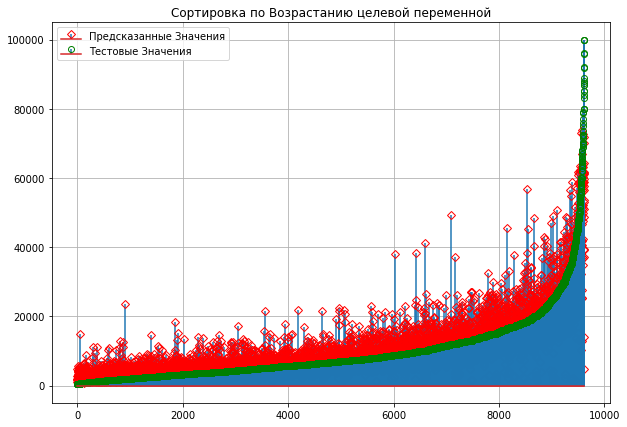

In [ ]:
fig=plt.figure(figsize=(10, 7))
sorted = np.argsort(y_test)
print_stem(y_predict[sorted], 'Предсказанные Значения', 'rD')
print_stem(y_test[sorted], 'Тестовые Значения', 'go')

plt.grid()
plt.title('Сортировка по Возрастанию целевой переменной')
plt.legend();

**Рассмотрим результаты перебора**

In [ ]:
DF_reg=pd.DataFrame(kNN_search.cv_results_)
DF = DF_reg[['param_n_neighbors','param_weights',
             'mean_test_score', 'std_test_score', 'rank_test_score']]
cm = sns.light_palette("purple", as_cmap=True)
hl = DF.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm)
hl

Если сравнивать с Линейной регрессией то результаты К Ближайших Соседей гораздо лучше

(коэффициент детерминации `0.77`против `0.49`)

# Neighborhood Components Analysis

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis # Neighborhood Components Analysis от scikit-learn

**Считываем данные, разбиваем на тестовую и тренировочную, нормализуем**

In [ ]:
X = df[num_columns].values  # берем, например только числовые данные
y = df["Transmission"].values # для классификации целевая метрика - тип Трансмиссии

features_names = df[num_columns].columns
# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# нормализуем
scaler  = MinMaxScaler()
scaler.fit(X_train) # для тренировочных сначала "обучаем"
X_train = scaler.transform(X_train) # потом преобразуем  transform
X_test  = scaler.transform(X_test) # для тестовых - просто transform

Применяем Neighborhood Components Analysis

Cтандартная для нас последовательность

* Создаем модель-объект (в этот раз ограничимся, допустим 2 компонентами)

* Обучаем через `.fit()`

* Преобразуем через `.transform()`

На тестовых данных, потому что может не хватить памяти

In [ ]:
nca = NeighborhoodComponentsAnalysis(n_components=2)
nca.fit(X_test,y_test)
X_nca = nca.transform(X_test)

Трансформируем оставшиеся данные

In [ ]:
X_nca_train = nca.transform(X_train)

**Визуализируем новое пространство**

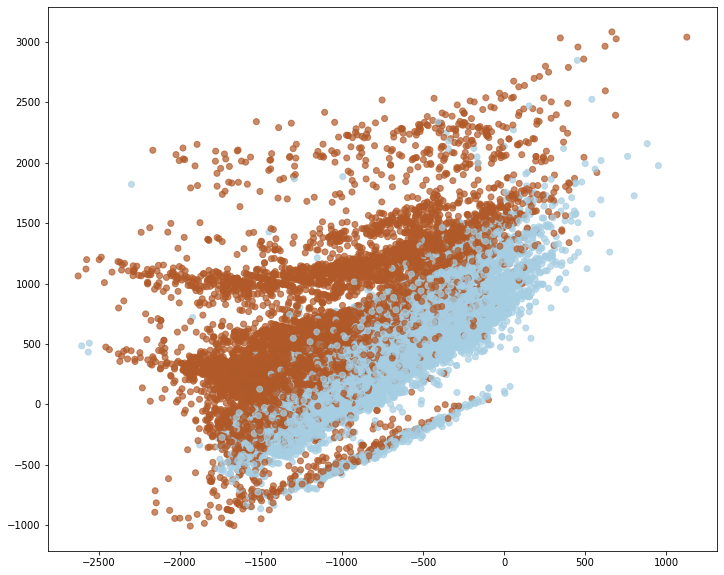

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(X_nca_train[:,0],X_nca_train[:,1],
            c =y_train, # подсвечиваем по целевой метке
            alpha = 0.7, cmap ='Paired' ,);

Достаточно много точек разбилось ровно

Интересно что нижный кластер состоит из обоих классов

Хотя с точки зрения логики метод нет противоречий - локально "ближайшие соседи" оптимизируются

Визуализация "весов" преобразования

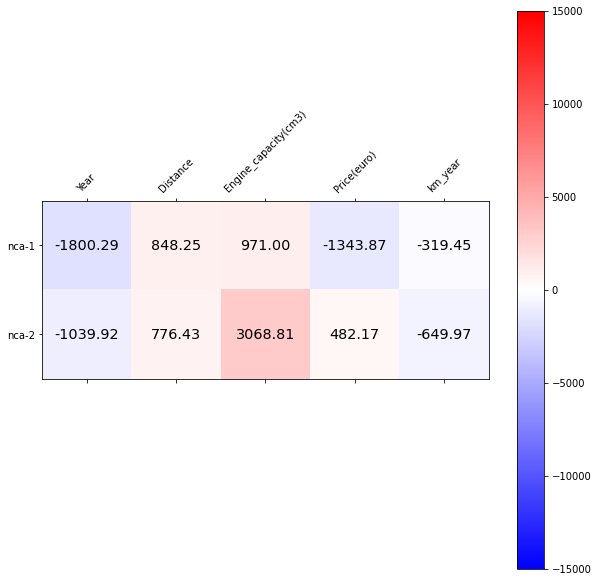

In [ ]:
fig=plt.figure(figsize=(10,10))
W = nca.components_
nca_names = ['nca-'+str(x+1) for x in range(W.shape[0])]
plt.matshow(W.astype(float),cmap='bwr',vmin=-15000,vmax=15000, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), features_names,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),nca_names)
plt.colorbar();

Сравниваем Классификацию на обычных данных и на преобразованных

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=19,weights='distance' )

kNN.fit(X_nca_train, y_train)

scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

scores = cross_validate(kNN, X_nca_train, y_train,scoring=scoring, cv=StratifiedKFold(n_splits=5))

y_predict=kNN.predict(X_nca)


print('Cross-Validation error')


DF_nca=pd.DataFrame(scores)
DF_nca.columns = [name+'_nca' for name in DF_nca.columns]

DF_temp=pd.concat([DF_cv_best_kNN,DF_nca],axis=1)


display(DF_temp)
print('\n')
print(DF_temp.mean())
print('\n')


Cross-Validation error


fit_time  score_time  test_ACC   test_F1  test_Precision  test_Recall  \
0  0.012963    0.075139  0.813627  0.786969        0.828066     0.749758   
1  0.012635    0.072495  0.829176  0.803283        0.852477     0.759457   
2  0.012434    0.078766  0.820713  0.794170        0.839913     0.753152   
3  0.016728    0.089633  0.820490  0.795328        0.834755     0.759457   
4  0.012949    0.077919  0.816258  0.790130        0.830481     0.753518   

   fit_time_nca  score_time_nca  test_ACC_nca  test_F1_nca  \
0      0.053571        0.163345      0.813474     0.787028   
1      0.014461        0.065990      0.809977     0.782471   
2      0.016725        0.047184      0.804088     0.775372   
3      0.013922        0.087044      0.810151     0.785435   
4      0.024334        0.216535      0.812576     0.786081   

   test_Precision_nca  test_Recall_nca  
0            0.826412         0.751227  
1            0.823800         0.745091  
2            0.817763         0.737160  
3            0.815447         0.757553  
4            0.824896         0.750755



fit_time              0.013542
score_time            0.078791
test_ACC              0.820053
test_F1               0.793976
test_Precision        0.837139
test_Recall           0.755068
fit_time_nca          0.024603
score_time_nca        0.116020
test_ACC_nca          0.810053
test_F1_nca           0.783277
test_Precision_nca    0.821664
test_Recall_nca       0.748357
dtype: float64




Почему ускорения по времени не получилось (хоть и ожидалось)

Возможно потому что операции над нормированных значениях в диапазоне от 0 до 1 (пускай и в пятимерном пространстве) выгодней чем операции над разнародными данными порядка несколько тысяц (хоть и в двумерном пространстве)

# tSNE

In [ ]:
from sklearn.manifold import TSNE # TSNE от scikit-learn

In [ ]:
#@title Гиперпараметры tSNE {run: "auto" }
n_iter = 350 #@param {type:"slider", min:250, max:500, step:25}
perplexity = 50 #@param {type:"slider", min:5, max:50, step:5}

# создаем объект класса с указанием гиперпараметров
tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=perplexity,
            n_iter=n_iter, )

# обучаем и сразу трансформируем
# потому что это t-SNE
# и чисто "математически" нельзя отдельно fit и transform
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 32074 samples in 0.037s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 32074 samples in 1.547s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32074
[t-SNE] Computed conditional probabilities for sample 2000 / 32074
[t-SNE] Computed conditional probabilities for sample 3000 / 32074
[t-SNE] Computed conditional probabilities for sample 4000 / 32074
[t-SNE] Computed conditional probabilities for sample 5000 / 32074
[t-SNE] Computed conditional probabilities for sample 6000 / 32074
[t-SNE] Computed conditional probabilities for sample 7000 / 32074
[t-SNE] Computed conditional probabilities for sample 8000 / 32074
[t-SNE] Computed conditional probabilities for sample 9000 / 32074
[t-SNE] Computed conditional probabilities for sample 10000 / 32074
[t-SNE] Computed conditional probabilities for sample 11000 / 32074
[t-SNE] Computed conditional probabilities for sample 12000 / 32074
[t-SNE] Computed conditional probabilities for sample 13000 / 32074
[t-SNE] Computed conditional probabilities for sample 14000 / 32074

Визуализируем результат

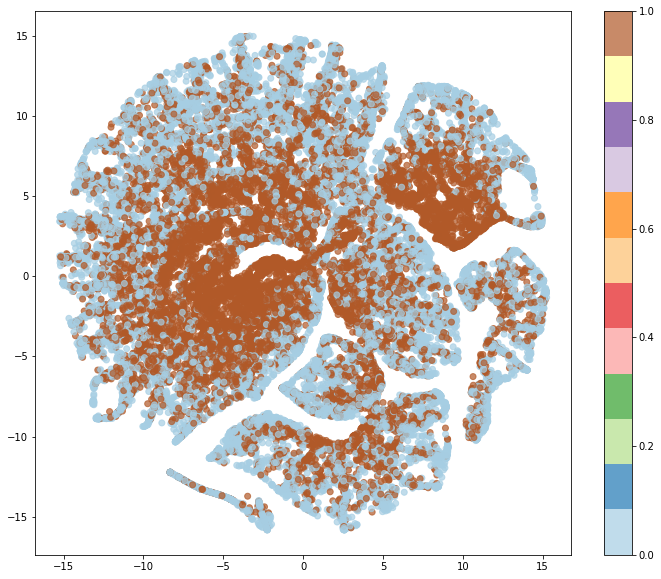

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1],
            c =df.Transmission.values, # подсцветим по типу трансмиссии
            alpha = 0.7, cmap ='Paired' ,)
plt.colorbar();

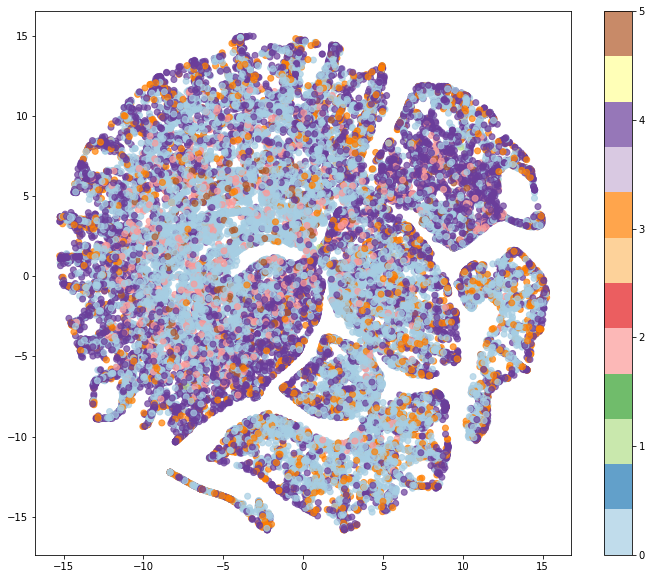

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1],
            c =df.Fuel_type.values,# подсцветим по типу топлива
            alpha = 0.7, cmap ='Paired' ,)
plt.colorbar();

Одназначных результатов нет, но отдельные скопления формируются

Они не связаны с категориальными признаками

Рекомендуется с помощью кластеризации выделить отдельные скопления и попытаться проанализировать их

С другой стороны имеет смысл запустить t-SNE с другим значением `perplexity`

При более низких значения `perplexity` будет другое низкомерное представление

# Контрольные вопросы